# Cats Classifier

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, Sequential

import gc

%matplotlib inline

In [2]:
def extract_values_from_history(history):
  train_accuracy = history.history['accuracy']
  validation_accuracy = history.history['val_accuracy']

  train_loss = history.history['loss']
  validation_loss = history.history['val_loss']

  return train_accuracy, validation_accuracy, train_loss, validation_loss

def accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss):
  # Accuracy and Loss graphical representation
  plt.figure(figsize=(8, 8))

  plt.subplot(2, 1, 1)
  plt.plot(train_accuracy, label='Training Accuracy')
  plt.plot(validation_accuracy, label='Validation Accuracy')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(train_loss, label='Training Loss')
  plt.plot(validation_loss, label='Validation Loss')
  plt.ylabel('Cross Entropy')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.legend()
  plt.show()

def mean_metrics(history):
  mean_accuracy = round(np.mean(history.history["accuracy"]) * 100, 2)
  std_accuracy = round(np.std(history.history["accuracy"]) * 100, 2)
  mean_validation_accuracy = round(np.mean(history.history["val_accuracy"]) * 100, 2)
  std_validation_accuracy = round(np.std(history.history["val_accuracy"]) * 100, 2)

  mean_loss = round(np.mean(history.history["loss"]), 3)
  std_loss = round(np.std(history.history["loss"]), 3)
  mean_validation_loss = round(np.mean(history.history["loss"]), 3)
  std_validation_loss = round(np.std(history.history["loss"]), 3)

  print(f"Mean Accuracy: {mean_accuracy} +/- {std_accuracy} & Mean Validation Accuracy: {mean_validation_accuracy} +/- {std_validation_accuracy}")
  print(f"Mean Loss: {mean_loss} +/- {std_loss} & Mean Validation Loss: {mean_validation_loss} +/- {std_validation_loss}")

## 1) Reading a random picture

In [3]:
path = "data/"

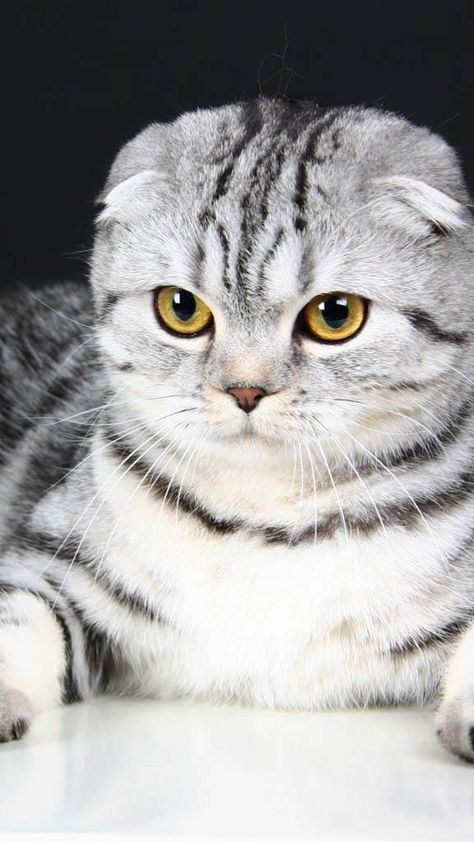

In [9]:
name = "Scottish Fold/Scottish Fold_1.jpg"
fullname = f'{path}/{name}'

# print a kitty picture
load_img(fullname)

## 2) Modelisation

### a) Preparing the data

In [10]:
img_height = 224
img_width = 224
batch_size = 20
channel = 3

In [11]:
img_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [12]:
# Creating a train set
train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode="sparse",
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 5600 images belonging to 20 classes.


In [13]:
# Creating a validation set
val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode="sparse",
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 1400 images belonging to 20 classes.


In [14]:
num_classes = train_set.num_classes
print(f"Number of classes : {num_classes}")

Number of classes : 20


In [15]:
class_names = train_set.class_indices
print(class_names)

{'Abyssinian': 0, 'American Bobtail': 1, 'American Curl': 2, 'American Shorthair': 3, 'Bengal': 4, 'Birman': 5, 'Bombay': 6, 'British Shorthair': 7, 'Egyptian Mau': 8, 'Exotic Shorthair': 9, 'Maine Coon': 10, 'Manx': 11, 'Norwegian Forest': 12, 'Persian': 13, 'Ragdoll': 14, 'Russian Blue': 15, 'Scottish Fold': 16, 'Siamese': 17, 'Sphynx': 18, 'Turkish Angora': 19}


### b) Custom CNN

In [11]:
model = keras.Sequential()
model.add(keras.Input(shape=(img_height, img_width, channel)))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

2023-12-12 20:44:33.311596: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-12 20:44:33.317661: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-12 20:44:33.318263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-12 20:44:33.319539: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 700928)            0         
                                                                 
 dense (Dense)               (None, 64)                44859456  
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
Total params: 44,861,652
Trainable params: 44,861,652
Non-trainable params: 0
____________________________________________

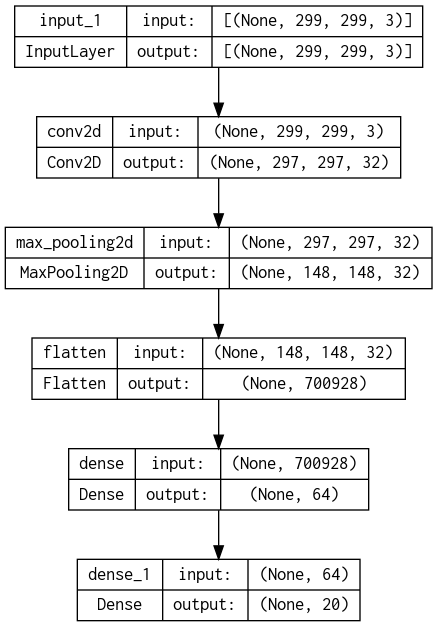

In [13]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [14]:
history = model.fit(
    train_set,
    epochs = 30,
    validation_data=val_set
)

Epoch 1/30


2023-12-12 20:44:34.524892: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21456240 exceeds 10% of free system memory.
2023-12-12 20:44:35.113630: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21456240 exceeds 10% of free system memory.
2023-12-12 20:44:35.309123: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21456240 exceeds 10% of free system memory.
2023-12-12 20:44:35.736476: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-12 20:44:36.349881: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-12 20:44:36.350317: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-12 20:44:36.350350: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-12 20:44:36.350903: I ten

  5/280 [..............................] - ETA: 39s - loss: 45.1689 - accuracy: 0.0400

2023-12-12 20:44:37.632155: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21456240 exceeds 10% of free system memory.


  9/280 [..............................] - ETA: 40s - loss: 39.6103 - accuracy: 0.0389

2023-12-12 20:44:38.291878: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21456240 exceeds 10% of free system memory.


280/280 [==============================] - 55s 188ms/step - loss: 4.4280 - accuracy: 0.0491 - val_loss: 2.9953 - val_accuracy: 0.0507
Epoch 2/30
280/280 [==============================] - 47s 169ms/step - loss: 3.0009 - accuracy: 0.0445 - val_loss: 2.9956 - val_accuracy: 0.0500
Epoch 3/30
280/280 [==============================] - 48s 170ms/step - loss: 2.9944 - accuracy: 0.0463 - val_loss: 2.9962 - val_accuracy: 0.0500
Epoch 4/30
280/280 [==============================] - 49s 174ms/step - loss: 2.9962 - accuracy: 0.0418 - val_loss: 2.9959 - val_accuracy: 0.0500
Epoch 5/30
280/280 [==============================] - 47s 169ms/step - loss: 2.9959 - accuracy: 0.0445 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 6/30
280/280 [==============================] - 48s 170ms/step - loss: 2.9954 - accuracy: 0.0425 - val_loss: 2.9959 - val_accuracy: 0.0500
Epoch 7/30
280/280 [==============================] - 47s 169ms/step - loss: 2.9955 - accuracy: 0.0405 - val_loss: 2.9957 - val_accuracy: 0.0

In [15]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)

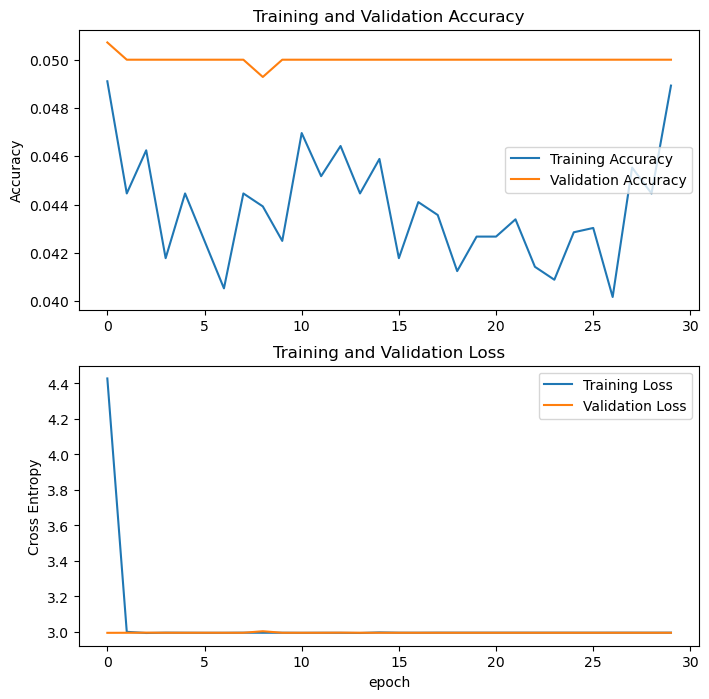

In [16]:
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [17]:
mean_metrics(history)

Mean Accuracy: 4.39 +/- 0.22 & Mean Validation Accuracy: 5.0 +/- 0.02
Mean Loss: 3.044 +/- 0.257 & Mean Validation Loss: 3.044 +/- 0.257


#### Data Augmentation

In [18]:
img_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 5600 images belonging to 20 classes.
Found 1400 images belonging to 20 classes.


In [19]:
history = model.fit(
    train_set,
    epochs = 30,
    validation_data=val_set
)

Epoch 1/30
280/280 [==============================] - 154s 549ms/step - loss: 2.9962 - accuracy: 0.0398 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 2/30
280/280 [==============================] - 152s 542ms/step - loss: 2.9961 - accuracy: 0.0470 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 3/30
280/280 [==============================] - 151s 538ms/step - loss: 2.9962 - accuracy: 0.0429 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 4/30
280/280 [==============================] - 152s 543ms/step - loss: 2.9962 - accuracy: 0.0404 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 5/30
280/280 [==============================] - 152s 542ms/step - loss: 2.9962 - accuracy: 0.0418 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 6/30
280/280 [==============================] - 152s 542ms/step - loss: 2.9962 - accuracy: 0.0421 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 7/30
280/280 [==============================] - 152s 542ms/step - loss: 2.9962 - accuracy: 0.0423 - val_loss: 2.9957 -

In [20]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)

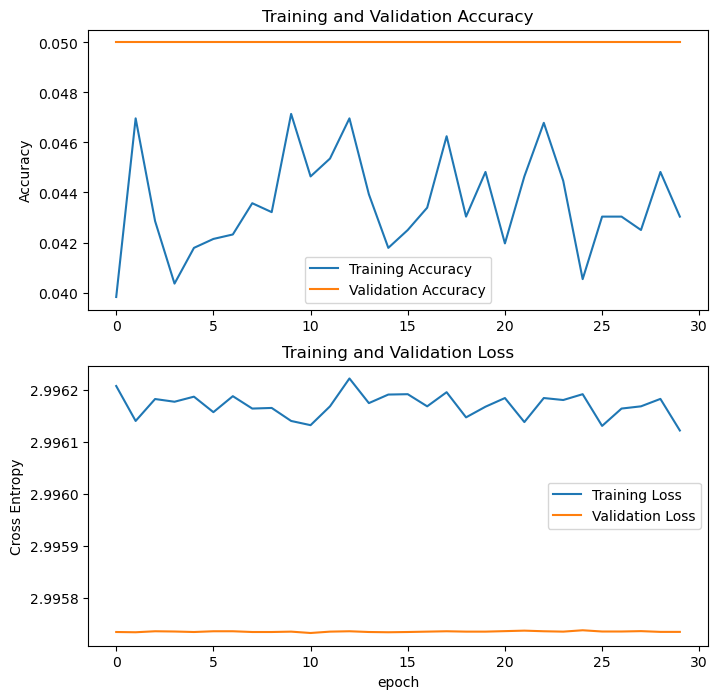

In [21]:
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [22]:
mean_metrics(history)

Mean Accuracy: 4.36 +/- 0.19 & Mean Validation Accuracy: 5.0 +/- 0.0
Mean Loss: 2.996 +/- 0.0 & Mean Validation Loss: 2.996 +/- 0.0


In [23]:
del history
del model
del train_set
del val_set

gc.collect()

14576

### b) Transfer Learning

#### MobileNet

- Training

In [5]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [16]:
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             validation_split=0.2)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

Found 5600 images belonging to 20 classes.
Found 1400 images belonging to 20 classes.


In [17]:
img_height = 224
img_width = 224

In [24]:
base_model = MobileNetV2(weights="imagenet",
                         include_top=False,
                         input_shape=(img_height, img_width, channel))

base_model.trainable = False

inputs = keras.Input(shape=(img_height, img_width, channel))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)

model = keras.Model(inputs, outputs)

In [25]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.sparse_categorical_crossentropy

In [26]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 20)                25620     
                                                                 
Total params: 2,283,604
Trainable params: 25,620
Non-trainable params: 2,257,984
_________________________________________________________________


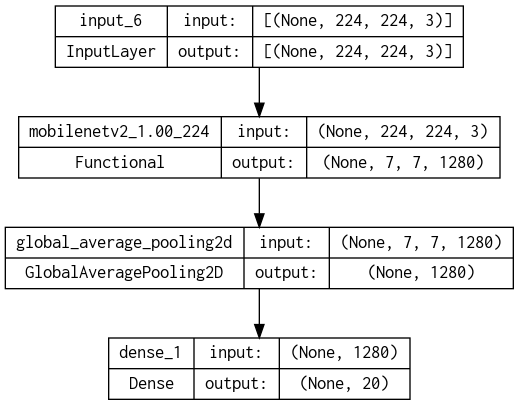

In [28]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [29]:
history = model.fit(train_set,
                    epochs=30,
                    validation_data=val_set)

Epoch 1/30
280/280 [==============================] - 56s 194ms/step - loss: 1.8557 - accuracy: 0.5775 - val_loss: 1.8808 - val_accuracy: 0.6129
Epoch 2/30
280/280 [==============================] - 49s 174ms/step - loss: 1.0449 - accuracy: 0.7320 - val_loss: 2.1044 - val_accuracy: 0.5964
Epoch 3/30
280/280 [==============================] - 48s 172ms/step - loss: 0.8582 - accuracy: 0.7812 - val_loss: 2.3839 - val_accuracy: 0.6143
Epoch 4/30
280/280 [==============================] - 49s 175ms/step - loss: 0.6145 - accuracy: 0.8270 - val_loss: 2.5393 - val_accuracy: 0.6171
Epoch 5/30
280/280 [==============================] - 48s 171ms/step - loss: 0.5189 - accuracy: 0.8607 - val_loss: 2.3611 - val_accuracy: 0.6343
Epoch 6/30
280/280 [==============================] - 48s 171ms/step - loss: 0.3431 - accuracy: 0.8930 - val_loss: 2.3606 - val_accuracy: 0.6307
Epoch 7/30
280/280 [==============================] - 48s 171ms/step - loss: 0.3226 - accuracy: 0.8966 - val_loss: 2.5421 - val_ac

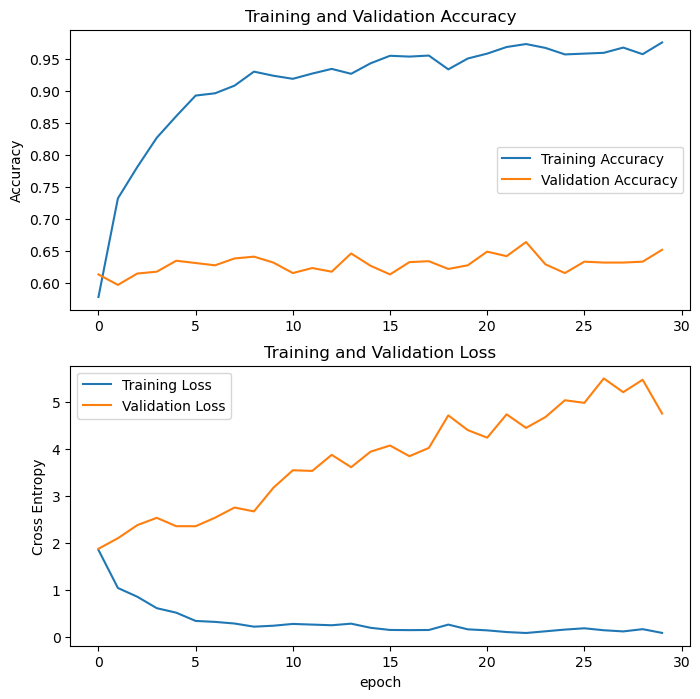

In [30]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [31]:
mean_metrics(history)

Mean Accuracy: 91.27 +/- 8.37 & Mean Validation Accuracy: 62.91 +/- 1.34
Mean Loss: 0.326 +/- 0.357 & Mean Validation Loss: 0.326 +/- 0.357


- Adjusting learning rate

In [32]:
def make_model(learning_rate=0.01):
    base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [33]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_set,
                        epochs=30,
                        validation_data=val_set)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/30
280/280 [==============================] - 51s 174ms/step - loss: 2.6527 - accuracy: 0.2186 - val_loss: 2.1972 - val_accuracy: 0.3593
Epoch 2/30
280/280 [==============================] - 48s 171ms/step - loss: 1.8479 - accuracy: 0.4873 - val_loss: 1.7358 - val_accuracy: 0.5071
Epoch 3/30
280/280 [==============================] - 48s 171ms/step - loss: 1.4900 - accuracy: 0.5884 - val_loss: 1.5062 - val_accuracy: 0.5621
Epoch 4/30
280/280 [==============================] - 48s 170ms/step - loss: 1.2920 - accuracy: 0.6377 - val_loss: 1.3728 - val_accuracy: 0.6036
Epoch 5/30
280/280 [==============================] - 47s 169ms/step - loss: 1.1643 - accuracy: 0.6677 - val_loss: 1.2862 - val_accuracy: 0.6179
Epoch 6/30
280/280 [==============================] - 49s 175ms/step - loss: 1.0749 - accuracy: 0.6932 - val_loss: 1.2203 - val_accuracy: 0.6364
Epoch 7/30
280/280 [==============================] - 48s 170ms/step - loss: 1.0049 - accuracy: 0.7080 - val_loss: 1.1750 -

280/280 [==============================] - 48s 172ms/step - loss: 0.0627 - accuracy: 0.9986 - val_loss: 1.3011 - val_accuracy: 0.6779
Epoch 28/30
280/280 [==============================] - 48s 170ms/step - loss: 0.0578 - accuracy: 0.9984 - val_loss: 1.3182 - val_accuracy: 0.6764
Epoch 29/30
280/280 [==============================] - 47s 169ms/step - loss: 0.0527 - accuracy: 0.9991 - val_loss: 1.3329 - val_accuracy: 0.6743
Epoch 30/30
280/280 [==============================] - 48s 171ms/step - loss: 0.0490 - accuracy: 0.9995 - val_loss: 1.3573 - val_accuracy: 0.6736


0.01
Epoch 1/30
280/280 [==============================] - 51s 173ms/step - loss: 1.9096 - accuracy: 0.5677 - val_loss: 1.9467 - val_accuracy: 0.6071
Epoch 2/30
280/280 [==============================] - 48s 170ms/step - loss: 1.0568 - accuracy: 0.7296 - val_loss: 2.0787 - val_accuracy: 0.6200
Epoch 3/30
280/280 [==============================] - 48s 171ms/step - loss: 0.8081 - accuracy: 0.7884 - val_loss: 2.2301 - val_acc

280/280 [==============================] - 47s 169ms/step - loss: 1.7560 - accuracy: 0.9521 - val_loss: 47.4655 - val_accuracy: 0.6307
Epoch 24/30
280/280 [==============================] - 48s 171ms/step - loss: 1.8758 - accuracy: 0.9479 - val_loss: 43.3477 - val_accuracy: 0.6450
Epoch 25/30
280/280 [==============================] - 48s 170ms/step - loss: 1.7496 - accuracy: 0.9493 - val_loss: 46.9677 - val_accuracy: 0.6364
Epoch 26/30
280/280 [==============================] - 48s 171ms/step - loss: 1.8074 - accuracy: 0.9493 - val_loss: 48.8750 - val_accuracy: 0.6343
Epoch 27/30
280/280 [==============================] - 48s 170ms/step - loss: 1.6784 - accuracy: 0.9498 - val_loss: 49.6161 - val_accuracy: 0.6207
Epoch 28/30
280/280 [==============================] - 48s 171ms/step - loss: 1.5661 - accuracy: 0.9539 - val_loss: 52.6646 - val_accuracy: 0.6286
Epoch 29/30
280/280 [==============================] - 48s 171ms/step - loss: 1.5077 - accuracy: 0.9538 - val_loss: 50.5944 - val_

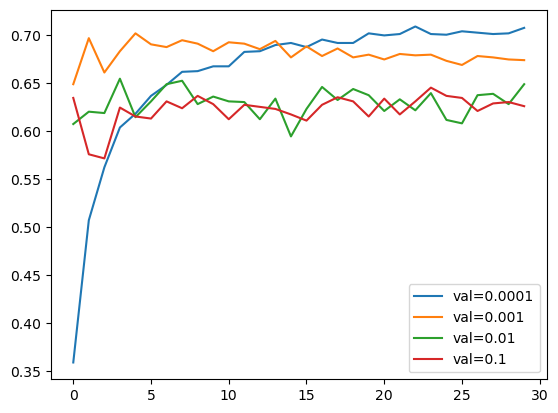

In [36]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))
plt.legend()

- Adding more layers

In [38]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(inner)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [39]:
learning_rate = 0.0001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/30
280/280 [==============================] - 50s 172ms/step - loss: 2.8598 - accuracy: 0.1179 - val_loss: 2.7175 - val_accuracy: 0.1850
Epoch 2/30
280/280 [==============================] - 47s 170ms/step - loss: 2.5642 - accuracy: 0.2486 - val_loss: 2.4817 - val_accuracy: 0.2821
Epoch 3/30
280/280 [==============================] - 47s 170ms/step - loss: 2.3425 - accuracy: 0.3254 - val_loss: 2.2972 - val_accuracy: 0.3407
Epoch 4/30
280/280 [==============================] - 48s 170ms/step - loss: 2.1605 - accuracy: 0.3818 - val_loss: 2.1450 - val_accuracy: 0.3779
Epoch 5/30
280/280 [==============================] - 48s 170ms/step - loss: 2.0047 - accuracy: 0.4234 - val_loss: 2.0102 - val_accuracy: 0.4079
Epoch 6/30
280/280 [==============================] - 48s 171ms/step - loss: 1.8705 - accuracy: 0.4554 - val_loss: 1.9015 - val_accuracy: 0.4307
Epoch 7/30
280/280 [==============================] - 47s 169ms/step - loss: 1.7559 - accuracy: 0.4829 - val_loss: 1.7997 - val

280/280 [==============================] - 48s 171ms/step - loss: 0.2384 - accuracy: 0.9570 - val_loss: 0.9743 - val_accuracy: 0.6907
Epoch 28/30
280/280 [==============================] - 48s 171ms/step - loss: 0.2271 - accuracy: 0.9580 - val_loss: 0.9689 - val_accuracy: 0.7014
Epoch 29/30
280/280 [==============================] - 48s 171ms/step - loss: 0.2148 - accuracy: 0.9625 - val_loss: 0.9769 - val_accuracy: 0.6950
Epoch 30/30
280/280 [==============================] - 48s 171ms/step - loss: 0.2028 - accuracy: 0.9668 - val_loss: 0.9840 - val_accuracy: 0.6957


1000
Epoch 1/30
280/280 [==============================] - 51s 173ms/step - loss: 1.5238 - accuracy: 0.5532 - val_loss: 1.1881 - val_accuracy: 0.6450
Epoch 2/30
280/280 [==============================] - 48s 170ms/step - loss: 0.8578 - accuracy: 0.7325 - val_loss: 1.0139 - val_accuracy: 0.6857
Epoch 3/30
280/280 [==============================] - 48s 171ms/step - loss: 0.6833 - accuracy: 0.7886 - val_loss: 0.9787 - val_acc

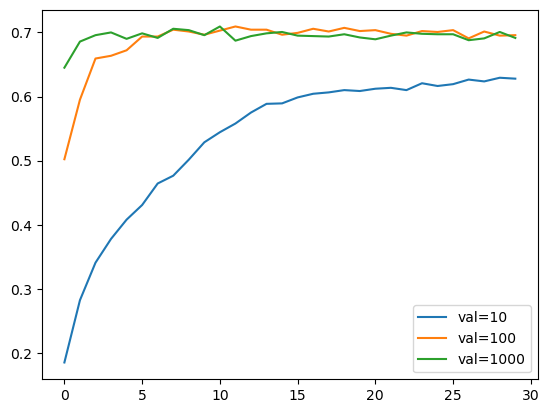

In [40]:
for size, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.legend()

- Dropout & Regularization

In [41]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = MobileNetV2(
    weights='imagenet',
    include_top = False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [42]:
learning_rate = 0.0001
size = 100

scores = {}

for drop in [0, 0.2, 0.5, 0.8]:
    print(drop)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=drop)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[drop] = history.history

    print()
    print()

0
Epoch 1/30
280/280 [==============================] - 52s 175ms/step - loss: 2.2584 - accuracy: 0.3459 - val_loss: 1.7507 - val_accuracy: 0.5136
Epoch 2/30
280/280 [==============================] - 48s 172ms/step - loss: 1.3953 - accuracy: 0.5954 - val_loss: 1.3506 - val_accuracy: 0.5907
Epoch 3/30
280/280 [==============================] - 48s 171ms/step - loss: 1.0976 - accuracy: 0.6695 - val_loss: 1.1911 - val_accuracy: 0.6321
Epoch 4/30
280/280 [==============================] - 48s 173ms/step - loss: 0.9403 - accuracy: 0.7193 - val_loss: 1.1075 - val_accuracy: 0.6471
Epoch 5/30
280/280 [==============================] - 49s 174ms/step - loss: 0.8389 - accuracy: 0.7473 - val_loss: 1.0611 - val_accuracy: 0.6679
Epoch 6/30
280/280 [==============================] - 48s 170ms/step - loss: 0.7636 - accuracy: 0.7720 - val_loss: 1.0374 - val_accuracy: 0.6679
Epoch 7/30
280/280 [==============================] - 48s 171ms/step - loss: 0.7050 - accuracy: 0.7914 - val_loss: 1.0111 - val_

280/280 [==============================] - 47s 168ms/step - loss: 0.4072 - accuracy: 0.8834 - val_loss: 0.9159 - val_accuracy: 0.7143
Epoch 28/30
280/280 [==============================] - 47s 168ms/step - loss: 0.3942 - accuracy: 0.8825 - val_loss: 0.9127 - val_accuracy: 0.7171
Epoch 29/30
280/280 [==============================] - 47s 169ms/step - loss: 0.3754 - accuracy: 0.8877 - val_loss: 0.9138 - val_accuracy: 0.7129
Epoch 30/30
280/280 [==============================] - 47s 169ms/step - loss: 0.3578 - accuracy: 0.8984 - val_loss: 0.9240 - val_accuracy: 0.7064


0.5
Epoch 1/30
280/280 [==============================] - 51s 172ms/step - loss: 2.8412 - accuracy: 0.1525 - val_loss: 2.3199 - val_accuracy: 0.3843
Epoch 2/30
280/280 [==============================] - 47s 168ms/step - loss: 2.2043 - accuracy: 0.3373 - val_loss: 1.8304 - val_accuracy: 0.5086
Epoch 3/30
280/280 [==============================] - 47s 168ms/step - loss: 1.8651 - accuracy: 0.4277 - val_loss: 1.5474 - val_accu

280/280 [==============================] - 47s 169ms/step - loss: 1.4862 - accuracy: 0.5148 - val_loss: 1.1543 - val_accuracy: 0.6829
Epoch 24/30
280/280 [==============================] - 47s 168ms/step - loss: 1.4750 - accuracy: 0.5238 - val_loss: 1.1418 - val_accuracy: 0.6836
Epoch 25/30
280/280 [==============================] - 48s 170ms/step - loss: 1.4518 - accuracy: 0.5230 - val_loss: 1.1249 - val_accuracy: 0.6857
Epoch 26/30
280/280 [==============================] - 47s 168ms/step - loss: 1.4238 - accuracy: 0.5334 - val_loss: 1.1228 - val_accuracy: 0.6850
Epoch 27/30
280/280 [==============================] - 47s 169ms/step - loss: 1.4185 - accuracy: 0.5432 - val_loss: 1.1027 - val_accuracy: 0.6929
Epoch 28/30
280/280 [==============================] - 47s 169ms/step - loss: 1.3968 - accuracy: 0.5309 - val_loss: 1.1048 - val_accuracy: 0.6893
Epoch 29/30
280/280 [==============================] - 47s 167ms/step - loss: 1.3784 - accuracy: 0.5398 - val_loss: 1.0850 - val_accurac

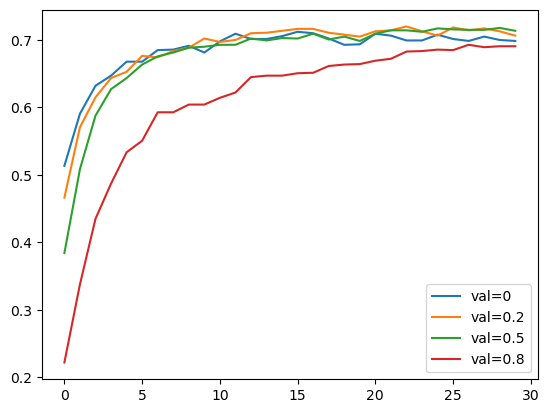

In [43]:
for drop, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % drop))
plt.legend()

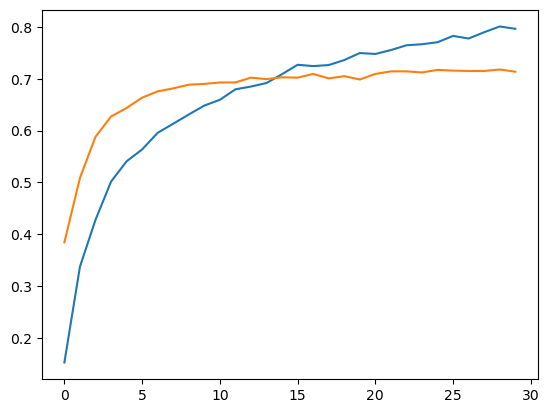

In [44]:
hist = scores[0.5]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

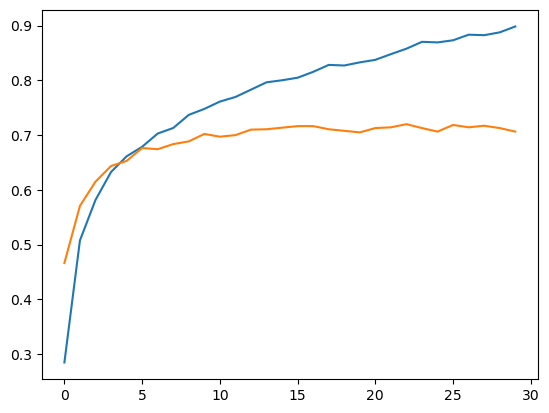

In [45]:
hist = scores[0.2]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

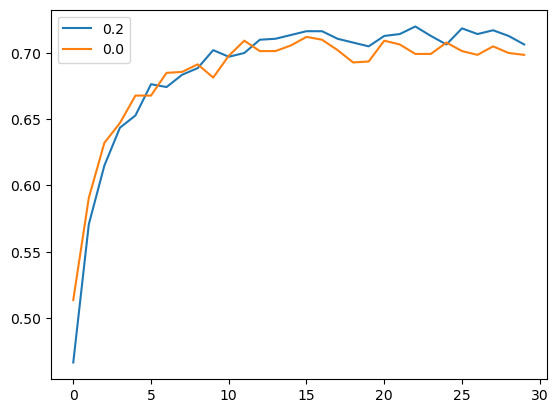

In [46]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

plt.legend()

- Data Augmentation

In [54]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = train_gen.flow_from_directory(
    path,
    subset="training",
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_gen = ImageDataGenerator(preprocessing_function = preprocess_input, validation_split=0.2)

val_set = val_gen.flow_from_directory(path, subset="validation", target_size=(img_height, img_width),batch_size=batch_size)

Found 5600 images belonging to 20 classes.
Found 1400 images belonging to 20 classes.


In [55]:
learning_rate = 0.0001
size = 100
drop = 0.5

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)

In [56]:
history = model.fit(train_set,
                    epochs=50,
                    validation_data=val_set)

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/opt/saturncloud/envs/saturn/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/saturncloud/envs/saturn/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/traitlets/config/application.py", line 978, in launch_instance
      app.start()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell
      await result
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_103/2563450424.py", line 1, in <module>
      history = model.fit(train_set,
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [20,20] and labels shape [400]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_673133]

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Training a larger model

In [57]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size, input_size, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(input_size, input_size, channel))
    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [58]:
input_size = 224

In [59]:
img_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    target_size=(input_size, input_size),
    batch_size=batch_size
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
)

val_set = val_gen.flow_from_directory(
    path,
    subset="validation",
    target_size=(input_size, input_size),
    batch_size=batch_size,
    shuffle=False
)

Found 5600 images belonging to 20 classes.
Found 1400 images belonging to 20 classes.


In [60]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'mobilenet_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

In [62]:
learning_rate = 0.0001
size = 100
drop = 0.5

model = make_model(
    input_size = input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set, epochs=50, validation_data=val_set,
                   callbacks=[checkpoint])

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/opt/saturncloud/envs/saturn/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/saturncloud/envs/saturn/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/traitlets/config/application.py", line 978, in launch_instance
      app.start()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell
      await result
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_103/627644876.py", line 10, in <module>
      history = model.fit(train_set, epochs=50, validation_data=val_set,
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [20,20] and labels shape [400]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_681535]

In [ ]:
del history
del model
del train_set
del val_set
del preprocess_input

gc.collect()

- VGG19

In [ ]:
from tensorflow.keras.applications.VGG19 import VGG19
from tensorflow.keras.applications.VGG19 import preprocess_input

In [ ]:
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             validation_split=0.2)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

In [ ]:
base_model = VGG19(weights="imagenet",
                   include_top=False,
                   input_shape=(img_height, img_width, channel))

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.sparse_categorical_crossentropy

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_set,
                    epochs=30,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Adjusting learning rate

In [ ]:
def make_model(learning_rate=0.01):
    base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_set,
                        epochs=30,
                        validation_data=val_set)
    scores[lr] = history.history

    print()
    print()

In [ ]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

- Adding more layers

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(inner)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[size] = history.history

    print()
    print()

In [ ]:
for size, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

- Dropout & Regularization

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =
size =

scores = {}

for drop in [0, 0.2, 0.5, 0.8]:
    print(drop)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=drop)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[drop] = history.history

    print()
    print()

In [ ]:
for drop, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % drop))
plt.legend()

In [ ]:
hist = scores[0.5]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

plt.legend()

- Data Augmentation

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = train_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

val_set = val_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=batch_size
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set,
                    epochs=50,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Training a larger model

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size, input_size, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(input_size, input_size, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
img_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    target_size=(input_size, input_size),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    target_size=(input_size, input_size),
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'vgg19_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    input_size = input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set, epochs=50, validation_data=val_set,
                   callbacks=[checkpoint])

In [ ]:
del history
del model
del train_set
del val_set
del preprocess_input

gc.collect()

- Xception

In [ ]:
from tensorflow.keras.applications.Xception import Xception
from tensorflow.keras.applications.Xception import preprocess_input

In [ ]:
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             validation_split=0.2)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

In [ ]:
base_model = Xception(weights="imagenet",
                      include_top=False,
                      input_shape=(img_height, img_width, channel))

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.sparse_categorical_crossentropy

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_set,
                    epochs=30,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Adjusting learning rate

In [ ]:
def make_model(learning_rate=0.01):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_set,
                        epochs=30,
                        validation_data=val_set)
    scores[lr] = history.history

    print()
    print()

In [ ]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

- Adding more layers

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(inner)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[size] = history.history

    print()
    print()

In [ ]:
for size, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

- Dropout & Regularization

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =
size =

scores = {}

for drop in [0, 0.2, 0.5, 0.8]:
    print(drop)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=drop)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[drop] = history.history

    print()
    print()

In [ ]:
for drop, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % drop))
plt.legend()

In [ ]:
hist = scores[0.5]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

plt.legend()

- Data augmentation

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = train_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

val_set = val_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=batch_size
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set,
                    epochs=50,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Training a larger model

In [ ]:
def make_model(input_size=299, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size, input_size, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(input_size, input_size, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
img_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    target_size=(input_size, input_size),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    target_size=(input_size, input_size),
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    input_size = input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set, epochs=50, validation_data=val_set,
                   callbacks=[checkpoint])

In [ ]:
del history
del model
del train_set
del val_set
del preprocess_input

gc.collect()

- EfficientNet

In [ ]:
from tensorflow.keras.applications.EfficientBNet7 import EfficientBNet7
from tensorflow.keras.applications.EfficientBNet7 import preprocess_input

In [ ]:
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             validation_split=0.2)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width),
    batch_size=batch_size
)

In [ ]:
base_model = EfficientBNet7(weights="imagenet",
                            include_top=False,
                         input_shape=(img_height, img_width, channel))

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.sparse_categorical_crossentropy

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_set,
                    epochs=30,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Adjusting learning rate

In [ ]:
def make_model(learning_rate=0.01):
    base_model = EfficientBNet7(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(num_classes, activation="softmax")(vectors)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_set,
                        epochs=30,
                        validation_data=val_set)
    scores[lr] = history.history

    print()
    print()

In [ ]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

- Adding more layers

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = EfficientBNet7(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(inner)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[size] = history.history

    print()
    print()

In [ ]:
for size, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

- Dropout & Regularization

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = EfficientBNet7(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(img_height, img_width, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate =
size =

scores = {}

for drop in [0, 0.2, 0.5, 0.8]:
    print(drop)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=drop)
    history = model.fit(train_set, epochs=30, validation_data=val_set)
    scores[drop] = history.history

    print()
    print()

In [ ]:
for drop, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % drop))
plt.legend()

In [ ]:
hist = scores[0.5]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['accuracy'], label=('train=%s' % drop))
plt.plot(hist['val_accuracy'], label=('val=%s' % drop))

In [ ]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

plt.legend()

- Data augmentation

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = train_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size
)

val_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

val_set = val_gen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=batch_size
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set,
                    epochs=50,
                    validation_data=val_set)

In [ ]:
train_accuracy, validation_accuracy, train_loss, validation_loss = extract_values_from_history(history)
accuracy_and_loss_graph(train_accuracy, validation_accuracy, train_loss, validation_loss)

In [ ]:
mean_metrics(history)

- Training a larger model

In [ ]:
def make_model(input_size=299, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = EfficientBNet7(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size, input_size, channel)
    )

    base_model.trainable = False

    #####################################################

    inputs = keras.Input(shape=(input_size, input_size, channel))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(num_classes, activation="softmax")(drop)
    model = keras.Model(inputs, outputs)

    #####################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.sparse_categorical_crossentropy

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
img_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split=0.2,
    fill_mode = "nearest"
)

train_set = img_gen.flow_from_directory(
    path,
    subset="training",
    target_size=(input_size, input_size),
    batch_size=batch_size
)

val_set = img_gen.flow_from_directory(
    path,
    subset="validation",
    target_size=(input_size, input_size),
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'efficientBnet7_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor="val_accuracy",
    mode="max"
)

In [ ]:
learning_rate =
size =
drop =

model = make_model(
    input_size = input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=drop)
history = model.fit(train_set, epochs=50, validation_data=val_set,
                   callbacks=[checkpoint])

**General**:
- [Introduction to Dropout for Regularization](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)
- [How Do Convolutional Layers Work?](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)

**Optimizer and Loss Functions for multiclasses classification:**

- [Adam Optimizer for multiclasses classification](https://towardsdatascience.com/multiclass-classification-neural-network-using-adam-optimizer-fb9a4d2f73f4)
- [Understanding Loss functions for classification](https://medium.com/mlearning-ai/understanding-loss-functions-for-classification-81c19ee72c2a)

**Transfer Learning**:
- [MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications](https://arxiv.org/abs/1704.04861)
- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)
- [Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/abs/1610.02357)
- [EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks](https://arxiv.org/abs/1905.11946)